In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [ ]:
#From Steinle et al.
#ZTF limiting mags in g- : m_g > 20.8
                    # i- : m_i > 19.9
    
#VRO "            "   g- : m_g > 24.81
                    # i-   m_i > 23.92
    
#So we will consider these 2 bands only 

# Gaussian Mc + q Sample

In [2]:
MODEL = 3
#filepath = f"...JSON cleaning/js_bns{MODEL}_{DATE}_clean.json.""
FILEPATH = '2411 jsons/js_bns3_2411_clean.json'
with open(FILEPATH, mode="r") as file:
    data = json.load(file)
    
kn_gauss = data["kilonovae"]

In [3]:
#making lists of peak apparent mags and peak times for the g band in the flat chirp mass distribution
g_pam_g = []
g_pt_g = []
for kn in kn_gauss:
    app_mags = [float(kn["data_points"][i]["magnitude"]) for i in range(len(kn["data_points"])) if kn["data_points"][i]["band"]=="g"]
    peak_am = np.min(app_mags)
    peak_index = np.argmin(app_mags)
    times = [float(kn["data_points"][i]["time"]) for i in range(len(kn["data_points"])) if kn["data_points"][i]["band"]=="g"]
    peak_time = times[peak_index]
    g_pam_g.append(peak_am)
    peak_time *= 24
    g_pt_g.append(peak_time)
    
    
#making lists of peak apparent mags and peak times for the i band in the Flat distribution
g_pam_i = []
g_pt_i = []
for kn in kn_gauss:
    app_mags = [float(kn["data_points"][i]["magnitude"]) for i in range(len(kn["data_points"])) if kn["data_points"][i]["band"]=="i"]
    peak_am = np.min(app_mags)
    peak_index = np.argmin(app_mags)
    times = [float(kn["data_points"][i]["time"]) for i in range(len(kn["data_points"])) if kn["data_points"][i]["band"]=="i"]
    peak_time = times[peak_index]
    g_pam_i.append(peak_am)
    peak_time *= 24
    g_pt_i.append(peak_time)

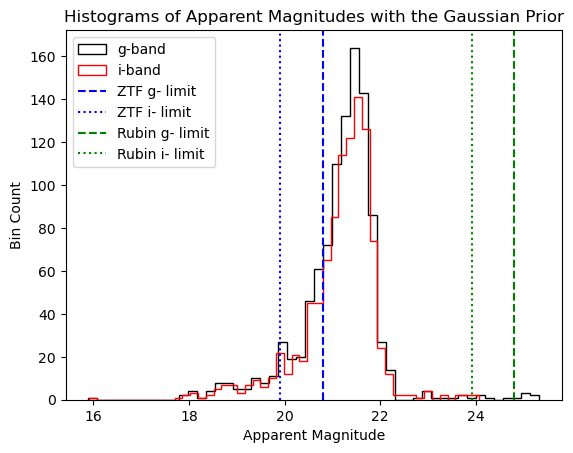

In [4]:
plt.hist(g_pam_g, bins = 50, color='black', histtype='step', label= 'g-band')
plt.hist(g_pam_i, bins = 50, color='red', histtype='step', label='i-band' )
plt.axvline(x= 20.8, color = 'blue', label='ZTF g- limit', linestyle='--')
plt.axvline(x= 19.9, color = 'blue', label='ZTF i- limit', linestyle = ':')

plt.axvline(x= 24.81, color = 'green', label='Rubin g- limit', linestyle='--')
plt.axvline(x= 23.92, color = 'green', label='Rubin i- limit', linestyle = ':')

plt.title("Histograms of Apparent Magnitudes with the Gaussian Prior" )
plt.xlabel("Apparent Magnitude")
plt.ylabel("Bin Count")
plt.legend()
plt.savefig('Gaussian prior lim. mags.pdf')

In [ ]:
g_pam_g_det = []
g_pam_i_det = []
for kn in kn_gauss:
    app_mags = [float(kn["data_points"][i]["magnitude"]) for i in range(len(kn["data_points"])) if kn["data_points"][i]["band"]=="g"]
    peak_am = np.min(app_mags)
    if peak_am < 23.427:
        

In [8]:
ztf_g_lim = 20.8
ztf_i_lim = 19.9
vro_g_lim = 24.81
vro_i_lim = 23.92


In [9]:
print('% of KN detectable by ZTF in g- :', round(len([i for i in g_pam_g if i<ztf_g_lim])/len(g_pam_g)*100, 2))
print('% of KN detectable by Rubin in g- :', round(len([i for i in g_pam_g if i<vro_g_lim])/len(g_pam_g)*100, 2))

print('% of KN detectable by ZTF in i- :', round(len([i for i in g_pam_i if i<ztf_i_lim])/len(g_pam_i)*100, 2))
print('% of KN detectable by Rubin in i- :', round(len([i for i in g_pam_i if i<vro_i_lim])/len(g_pam_i)*100, 2))

% of KN detectable by ZTF in g- : 23.79
% of KN detectable by Rubin in g- : 99.41
% of KN detectable by ZTF in i- : 7.04
% of KN detectable by Rubin in i- : 99.9


# Targeted follow up mode of Rubin

In [4]:
tfu_g = 26
tfu_i = 25

print('% of KN detectable by Rubin in g- :', round(len([i for i in g_pam_g if i<tfu_g])/len(g_pam_g)*100, 2))
print('% of KN detectable by Rubin in i- :', round(len([i for i in g_pam_i if i<tfu_i])/len(g_pam_i)*100, 2))

% of KN detectable by Rubin in g- : 100.0
% of KN detectable by Rubin in i- : 100.0


# Flat Mc + q

In [5]:
MODEL = 2
#filepath = f"...JSON cleaning/js_bns{MODEL}_{DATE}_clean.json.""
FILEPATH = 'JSON cleaning/js_bns2_test_2_clean.json'
with open(FILEPATH, mode="r") as file:
    data = json.load(file)
    
kn_flat = data["kilonovae"]

In [6]:
f_pam_g = []
f_pt_g = []
for kn in kn_flat:
    app_mags = [float(kn["data_points"][i]["magnitude"]) for i in range(len(kn["data_points"])) if kn["data_points"][i]["band"]=="g"]
    peak_am = np.min(app_mags)
    peak_index = np.argmin(app_mags)
    times = [float(kn["data_points"][i]["time"]) for i in range(len(kn["data_points"])) if kn["data_points"][i]["band"]=="g"]
    peak_time = times[peak_index]
    f_pam_g.append(peak_am)
    peak_time *= 24
    f_pt_g.append(peak_time)
    
    
#making lists of peak apparent mags and peak times for the i band in the Flat distribution
f_pam_i = []
f_pt_i = []
for kn in kn_flat:
    app_mags = [float(kn["data_points"][i]["magnitude"]) for i in range(len(kn["data_points"])) if kn["data_points"][i]["band"]=="i"]
    peak_am = np.min(app_mags)
    peak_index = np.argmin(app_mags)
    times = [float(kn["data_points"][i]["time"]) for i in range(len(kn["data_points"])) if kn["data_points"][i]["band"]=="i"]
    peak_time = times[peak_index]
    f_pam_i.append(peak_am)
    peak_time *= 24
    f_pt_i.append(peak_time)

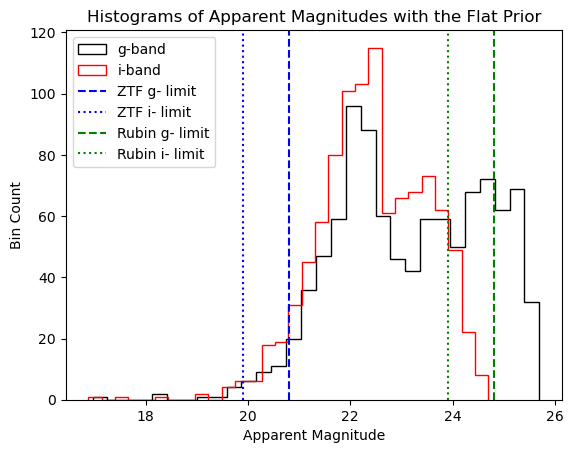

In [7]:
plt.hist(f_pam_g, bins = 30, color='black', histtype='step', label= 'g-band')
plt.hist(f_pam_i, bins = 30, color='red', histtype='step', label='i-band' )
plt.axvline(x= 20.8, color = 'blue', label='ZTF g- limit', linestyle='--')
plt.axvline(x= 19.9, color = 'blue', label='ZTF i- limit', linestyle = ':')

plt.axvline(x= 24.81, color = 'green', label='Rubin g- limit', linestyle='--')
plt.axvline(x= 23.92, color = 'green', label='Rubin i- limit', linestyle = ':')

plt.title("Histograms of Apparent Magnitudes with the Flat Prior" )
plt.xlabel("Apparent Magnitude")
plt.ylabel("Bin Count")
plt.legend()
plt.savefig('Flat prior lim. mags.pdf')

In [31]:
print('% of KN detectable by ZTF in g- :', round(len([i for i in f_pam_g if i<ztf_g_lim])/len(f_pam_g)*100, 2))
print('% of KN detectable by VRO in g- :', round(len([i for i in f_pam_g if i<vro_g_lim])/len(f_pam_g)*100, 2))

print('% of KN detectable by ZTF in i- :', round(len([i for i in f_pam_i if i<ztf_i_lim])/len(f_pam_i)*100, 2))
print('% of KN detectable by VRO in i- :', round(len([i for i in f_pam_i if i<vro_i_lim])/len(f_pam_i)*100, 2))

% of KN detectable by ZTF in g- : 3.7
% of KN detectable by VRO in g- : 83.4
% of KN detectable by ZTF in i- : 1.3
% of KN detectable by VRO in i- : 92.1


# targeted follow up

In [7]:
tfu_g = 26
tfu_i = 25

print('% of KN detectable by Rubin in g- :', round(len([i for i in f_pam_g if i<tfu_g])/len(f_pam_g)*100, 2))
print('% of KN detectable by Rubin in i- :', round(len([i for i in f_pam_i if i<tfu_i])/len(f_pam_i)*100, 2))

% of KN detectable by Rubin in g- : 100.0
% of KN detectable by Rubin in i- : 100.0


In [2]:
#multiply MRDs by volume of detection range 
#multiply by 5 years (ZTF running time so far)
#use %s to calculate how many KNe should have been detected in the 2 models

In [6]:
#MRDs from literature (https://arxiv.org/pdf/2004.09533.pdf)
nsbh_dyn = 41000
nsbh_iso = 49000
bns_dyn = 151000
bns_iso = 283000

#volume of det. range
vol = (4/3)*np.pi*(300)**3
vol

113097335.52923255

In [12]:
v_nsbh_dyn = nsbh_dyn * vol
v_nsbh_iso = nsbh_iso * vol
v_bns_dyn = bns_dyn * vol
v_bns_iso = bns_iso * vol

v_nsbh_dyn, v_nsbh_iso, v_bns_dyn, v_bns_iso

(4636990756.698534, 5541769440.932395, 17077697664.914114, 32006545954.77281)

In [13]:
#gaussian prior
#% of KN detectable by ZTF in g & i
gztf_g = 0.2379
gztf_i = 0.704
#% of KN detectable by Rubin in g & i
grubin_g = 99.41
grubin_i = 99.9


#flat prior
#% of KN detectable by ZTF in g & i
fztf_g = 0.037
fztf_i = 0.013
#% of KN detectable by Rubin in g & i
frubin_g = 83.4
frubin_i = 92.1

In [15]:
#no. of kne detectable
#bns_dyn
g_ztf_g = v_bns_dyn*gztf_g
g_ztf_i = v_bns_dyn*gztf_i
g_rubin_g = grubin_g*v_bns_dyn
g_rubin_i = grubin_i*v_bns_dyn



# No. of BNSs detected

In [4]:
#multiply MRDs by volume of detection range 
#multiply by 5 years (ZTF running time so far)
#use %s to calculate how many KNe should have been detected in the 2 models
#mutiply by 3/4 because that's the portion of sky covered by ZTF 
#times 0.5 cause 

#MRDs from literature
nsbh_dyn = 4.1e-8
nsbh_iso = 4.9e-8
bns_dyn = 1.51e-7
bns_iso = 2.83e-7

#volume of det. range
vol = (4/3)*np.pi*(300)**3

In [5]:
def detno(mrd, det_perc):
    det_no = (mrd)*(vol)*5*(det_perc/100)*0.75*0.5
    return det_no

## ZTF (over 5 years)

In [6]:
#detection percentages #gaussian prior #ztf
gztf_g = 23.79
gztf_i = 7.04
#detection percentages #flat prior #ztf
fztf_g = 3.7
fztf_i = 1.3

In [7]:
#gaussian prior
print('No. of KNe detectable by ZTF in g- for dynamical channel:', detno(bns_dyn, gztf_g))
print('No. of KNe detectable by ZTF in i- for dynamical channel:', detno(bns_dyn, gztf_i))
print('No. of KNe detectable by ZTF in g- for isolated channel:', detno(bns_iso, gztf_g))
print('No. of KNe detectable by ZTF in i- for isolated channel:', detno(bns_iso, gztf_i))

No. of KNe detectable by ZTF in g- for dynamical channel: 7.617720514655751
No. of KNe detectable by ZTF in i- for dynamical channel: 2.254256091768663
No. of KNe detectable by ZTF in g- for isolated channel: 14.276919904950844
No. of KNe detectable by ZTF in i- for isolated channel: 4.224864066030012


In [8]:
#flat prior
print('No. of KNe detectable by ZTF in g- for dynamical channel:', detno(bns_dyn, fztf_g))
print('No. of KNe detectable by ZTF in i- for dynamical channel:', detno(bns_dyn, fztf_i))
print('No. of KNe detectable by ZTF in g- for isolated channel:', detno(bns_iso, fztf_g))
print('No. of KNe detectable by ZTF in i- for isolated channel:', detno(bns_iso, fztf_i))

No. of KNe detectable by ZTF in g- for dynamical channel: 1.1847652755034168
No. of KNe detectable by ZTF in i- for dynamical channel: 0.4162688805822815
No. of KNe detectable by ZTF in g- for isolated channel: 2.220454125612364
No. of KNe detectable by ZTF in i- for isolated channel: 0.7801595576475874


## Rubin -every 5 years

In [9]:
#% of KN detectable in g & i #gaussian
grubin_g = 99.41
grubin_i = 99.9
#% of KN detectable in g & i #flat prior
frubin_g = 83.4
frubin_i = 92.1

In [10]:
#gaussian prior
print('No. of KNe detectable by Rubin in g- for dynamical channel:', detno(bns_dyn, grubin_g))
print('No. of KNe detectable by Rubin in i- for dynamical channel:', detno(bns_dyn, grubin_i))
print('No. of KNe detectable by Rubin in g- for isolated channel:', detno(bns_iso, grubin_g))
print('No. of KNe detectable by Rubin in i- for isolated channel:', detno(bns_iso, grubin_i))

No. of KNe detectable by Rubin in g- for dynamical channel: 31.831761091295846
No. of KNe detectable by Rubin in i- for dynamical channel: 31.98866243859225
No. of KNe detectable by Rubin in g- for isolated channel: 59.65820125057435
No. of KNe detectable by Rubin in i- for isolated channel: 59.952261391533824


In [11]:
#flat prior
print('No. of KNe detectable by Rubin in g- for dynamical channel:', detno(bns_dyn, frubin_g))
print('No. of KNe detectable by Rubin in i- for dynamical channel:', detno(bns_dyn, frubin_i))
print('No. of KNe detectable by Rubin in g- for isolated channel:', detno(bns_iso, frubin_g))
print('No. of KNe detectable by Rubin in i- for isolated channel:', detno(bns_iso, frubin_i))

No. of KNe detectable by Rubin in g- for dynamical channel: 26.705249723509446
No. of KNe detectable by Rubin in i- for dynamical channel: 29.49104915509855
No. of KNe detectable by Rubin in g- for isolated channel: 50.05023623677599
No. of KNe detectable by Rubin in i- for isolated channel: 55.27130404564829
